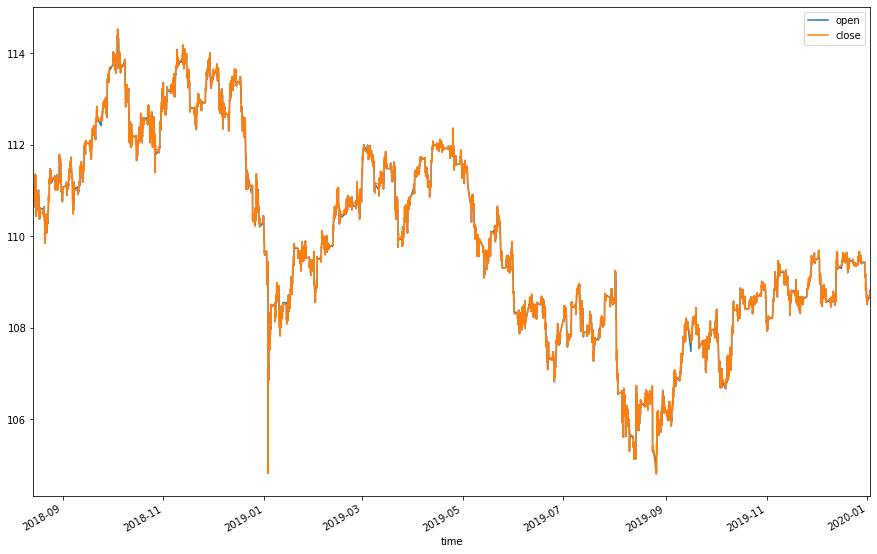

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('2018-08-14_06_00_00_2020-01-02_19_00_00_H1.csv', index_col='time', parse_dates=True)
df.drop(columns=['complete'],inplace=True)
df.plot(y=['open','close'],figsize=(15,10));

In [17]:
temp_df = df[['open']].diff().iloc[1:]>0
# temp_df = df[['open']]
labeled_df = temp_df.astype('int', copy=False)

In [18]:
labeled_df

,open
time,
2018-08-14 07:00:00,1
2018-08-14 08:00:00,0
2018-08-14 09:00:00,0
2018-08-14 10:00:00,1
2018-08-14 11:00:00,0
...,...
2020-01-02 15:00:00,1
2020-01-02 16:00:00,0
2020-01-02 17:00:00,1


In [4]:
from sklearn import model_selection
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [11]:
X = df[['open']].iloc[1:]
y = labeled_df

X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=5)
X

,open
time,
2018-08-14 07:00:00,110.748
2018-08-14 08:00:00,110.722
2018-08-14 09:00:00,110.633
2018-08-14 10:00:00,110.790
2018-08-14 11:00:00,110.778
...,...
2020-01-02 15:00:00,108.744
2020-01-02 16:00:00,108.710
2020-01-02 17:00:00,108.782


,open
time,
2018-08-14 07:00:00,1
2018-08-14 08:00:00,0
2018-08-14 09:00:00,0
2018-08-14 10:00:00,1
2018-08-14 11:00:00,0
...,...
2020-01-02 15:00:00,1
2020-01-02 16:00:00,0
2020-01-02 17:00:00,1


In [12]:
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

C:\Users\Seiya\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [13]:
rfc_pred = rfc.predict(X_test)

In [14]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

           0       0.50      0.50      0.50       870
           1       0.49      0.49      0.49       854

    accuracy                           0.50      1724
   macro avg       0.50      0.50      0.50      1724
weighted avg       0.50      0.50      0.50      1724



In [ ]:
print(confusion_matrix(y_test,rfc_pred))

Mistakes: classification(RF) is not appropriate for prediction
Must use another method(such as RNN)